In [6]:
import json
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np
import io
import boto3
import torch
import torchvision.transforms.functional as F


def frames_from_s3_paths(s3_paths: list, ) -> list:
    s3 = boto3.client('s3')
    stacked_frames = None
    
    for path in s3_paths:
        response = s3.get_object(Bucket='video-aws-bucket', Key=path)
        image_bytes = response['Body'].read()
        image = Image.open(io.BytesIO(image_bytes))
        frame = F.pil_to_tensor(image)
        
        if stacked_frames is None:
            stacked_frames = frame.unsqueeze(0)  # Add batch dimension
        else:
            stacked_frames = torch.cat((stacked_frames, frame.unsqueeze(0)), dim=0)
    
    return stacked_frames


paths = ["psa_1_frame_1.png", "psa_1_frame_2.png", "psa_1_frame_3.png"]

frames = frames_from_s3_paths(paths)

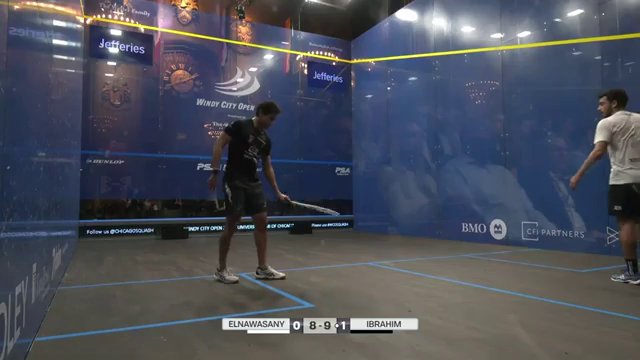

In [12]:
from PIL import Image
from torchvision.transforms.functional import to_pil_image

import matplotlib.pyplot as plt

# Convert each frame to PIL image and display
for i in range(len(frames)):
    frame_pil = to_pil_image(frames[i])
Image.fromarray(np.array(frame_pil))